In [1]:
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time #import libraries

In [2]:
URL='https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
page=requests.get(URL)
page.status_code  #scrap the page from web

200

In [3]:
soup=BeautifulSoup(page.content,'html.parser')
print(soup.prettify())  #prettify content of the page

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.9e9635.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e82689.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57

In [4]:
name=soup.find('div',class_="_4rR01T")
name #extract name 

<div class="_4rR01T">Motorola G34 5G (Ocean Green, 128 GB)</div>

In [5]:
name.text #only the name in text format

'Motorola G34 5G (Ocean Green, 128 GB)'

In [6]:
price=soup.find('div',class_='_30jeq3 _1_WHN1')
price.text #extract price

'₹11,999'

In [7]:
rating=soup.find('div',class_='_3LWZlK')
rating.text #ratings extract

'4.2'

In [8]:
specifications=soup.find('div',class_='fMghEO')
specifications.text #extract speceifications

'8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ Display50MP + 2MP | 16MP Front Camera5000 mAh BatterySnapdragon 695 5G ProcessorVegan Leather Design1 Year on Handset and 6 Months on Accessories'

In [9]:
specs=specifications.find('li',class_='rgWa7D')
specs.text #specifications

'8 GB RAM | 128 GB ROM'

In [10]:
specs=specifications.find_all('li',class_='rgWa7D')
specs #list of specifications  

[<li class="rgWa7D">8 GB RAM | 128 GB ROM</li>,
 <li class="rgWa7D">16.51 cm (6.5 inch) HD+ Display</li>,
 <li class="rgWa7D">50MP + 2MP | 16MP Front Camera</li>,
 <li class="rgWa7D">5000 mAh Battery</li>,
 <li class="rgWa7D">Snapdragon 695 5G Processor</li>,
 <li class="rgWa7D">Vegan Leather Design</li>,
 <li class="rgWa7D">1 Year on Handset and 6 Months on Accessories</li>]

In [11]:
product_details=soup.find_all('div',class_='_3pLy-c row')
print('Number of products: ',len(product_details))
product_details  #extract product details of all products on webpage 

Number of products:  24


[<div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">Motorola G34 5G (Ocean Green, 128 GB)</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTMOBGUFK4TZ2CJYHJPBUF6M_MOBGUFK4TZ2CJYHJ_"><div class="_3LWZlK">4.2</div></span><span class="_2_R_DZ"><span><span>6,481 Ratings </span><span class="_13vcmD">&amp;</span><span> 899 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">8 GB RAM | 128 GB ROM</li><li class="rgWa7D">16.51 cm (6.5 inch) HD+ Display</li><li class="rgWa7D">50MP + 2MP | 16MP Front Camera</li><li class="rgWa7D">5000 mAh Battery</li><li class="rgWa7D">Snapdragon 695 5G Processor</li><li class="rgWa7D">Vegan Leather Design</li><li class="rgWa7D">1 Year on Handset and 6 Months on Accessories</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹11,999</div><div class="_3I9_wc _27UcVY">₹<!-- -->14,999</div><div class="_3Ay6Sb"><span

In [12]:
for product in product_details:
    #name
    name=product.find('div',class_="_4rR01T")
    if name is None:
        print('Name not available')
    else:
        print(name.text) 
    
    price=product.find('div',class_='_30jeq3 _1_WHN1')
    #price
    if price is None:
        print('Price not available')
    else:
        print(price.text)
    
    rating=product.find('div',class_='_3LWZlK')
    #rating
    if rating is None:
        print('Rating not available')
    else:
        print(rating.text)
   
   #features
    features=[]
    specifications=product.find('div',class_='fMghEO')
    specs=specifications.find_all('li',class_='rgWa7D')
    for feature in specs:
        features.append(feature.text)
    print(features)
    
    
    print('\n','='*100,'\n')

Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Yea

In [13]:
#loop go through web pages
for x in range(1,21):
    URL='https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
    page=requests.get(URL)
    soup=BeautifulSoup(page.content,'html.parser')
    
    product_details=soup.find_all('div',class_='_3pLy-c row')
    print('Number of products: ',len(product_details))
    product_details
    
    for product in product_details:
        #name
        name=product.find('div',class_="_4rR01T")
        if name is None:
            print('Name not available')
        else:
            print(name.text) 
    
        price=product.find('div',class_='_30jeq3 _1_WHN1')
        #price
        if price is None:
            print('Price not available')
        else:
            print(price.text)
    
        rating=product.find('div',class_='_3LWZlK')
        #rating
        if rating is None:
            print('Rating not available')
        else:
            print(rating.text)
        
        #features
        features=[]
        specifications=product.find('div',class_='fMghEO')
        specs=specifications.find_all('li',class_='rgWa7D')
        for feature in specs:
            features.append(feature.text)
        print(features)
    
    
        print('\n','='*100,'\n')

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

In [14]:
titles=[]
prices=[]
ratings=[]
features=[]
#scraping through webpage

for x in range(1,21):
    start_time=time.time()
    URL='https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
    page=requests.get(URL)
    soup=BeautifulSoup(page.content,'html.parser')
    
    product_details=soup.find_all('div',class_='_3pLy-c row')
    
    for product in product_details:
        #name
        name=product.find('div',class_="_4rR01T")
        if name is None:
            titles.append(np.nan)
        else:
            titles.append(name.text) 
    
        price=product.find('div',class_='_30jeq3 _1_WHN1')
        #price
        if price is None:
            prices.append(np.nan)
        else:
            prices.append(price.text)
    
        rating=product.find('div',class_='_3LWZlK')
        #rating
        if rating is None:
            ratings.append(np.nan)
        else:
            ratings.append(rating.text)
        
        #features
        f=[]
        specifications=product.find('div',class_='fMghEO')
        specs=specifications.find_all('li',class_='rgWa7D')
        for feature in specs:
            f.append(feature.text)
        features.append(f)
    
    end_time=time.time()
    print('page {} completed in {} seconds'.format(x,end_time-start_time))

page 1 completed in 0.9513516426086426 seconds
page 2 completed in 0.7305471897125244 seconds
page 3 completed in 0.9504930973052979 seconds
page 4 completed in 0.8319697380065918 seconds
page 5 completed in 0.7035126686096191 seconds
page 6 completed in 0.8365411758422852 seconds
page 7 completed in 0.9060237407684326 seconds
page 8 completed in 0.9638550281524658 seconds
page 9 completed in 0.6977293491363525 seconds
page 10 completed in 0.7639570236206055 seconds
page 11 completed in 0.6152114868164062 seconds
page 12 completed in 0.9089105129241943 seconds
page 13 completed in 0.7584404945373535 seconds
page 14 completed in 0.78464674949646 seconds
page 15 completed in 0.7394123077392578 seconds
page 16 completed in 0.8896849155426025 seconds
page 17 completed in 0.8621230125427246 seconds
page 18 completed in 0.8218719959259033 seconds
page 19 completed in 0.7792906761169434 seconds
page 20 completed in 0.8471322059631348 seconds


In [15]:
print(len(titles))
print(len(prices))
print(len(ratings))
print(len(features)) #length of all titles

480
480
480
480


In [16]:
data={'Product_name' : titles,
      'Price'        : prices,
      'Rating'       : ratings,
      'Features'     : features}
df=pd.DataFrame(data)
df.head(10) #creating datdaset

,Product_name,Price,Rating,Features
0,"Motorola G34 5G (Ocean Green, 128 GB)","₹11,999",4.2,"[8 GB RAM | 128 GB ROM, 16.51 cm (6.5 inch) HD..."
1,"Apple iPhone 15 (Blue, 128 GB)","₹72,999",4.6,"[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ..."
2,"Motorola G34 5G (Ocean Green, 128 GB)","₹10,999",4.2,"[4 GB RAM | 128 GB ROM, 16.51 cm (6.5 inch) HD..."
3,"Motorola g54 5G (Midnight Blue, 128 GB)","₹13,999",4.2,"[8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,..."
4,"POCO C51 (Royal Blue, 64 GB)","₹5,499",4,"[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ..."
5,"Motorola g54 5G (Midnight Blue, 256 GB)","₹15,999",4.2,[12 GB RAM | 256 GB ROM | Expandable Upto 1 TB...
6,"Motorola G34 5G (Ice Blue, 128 GB)","₹11,999",4.2,"[8 GB RAM | 128 GB ROM, 16.51 cm (6.5 inch) HD..."
7,"POCO C55 (Forest Green, 128 GB)","₹6,499",4.2,"[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,..."
8,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹5,999",4.2,"[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ..."
9,"Apple iPhone 15 (Black, 128 GB)","₹72,999",4.6,"[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ..."


In [17]:
df.Rating=df.Rating.astype(float)
df.Price=df.Price.apply(lambda s : float(s.replace('₹','').replace(',','')))

df.info() #convert data type to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  480 non-null    object 
 1   Price         480 non-null    float64
 2   Rating        480 non-null    float64
 3   Features      480 non-null    object 
dtypes: float64(2), object(2)
memory usage: 15.1+ KB


In [18]:
df.Features=df.Features.apply(lambda x : ','.join(x))
df.head() #convert list to string

,Product_name,Price,Rating,Features
0,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ..."
1,"Apple iPhone 15 (Blue, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD..."
2,"Motorola G34 5G (Ocean Green, 128 GB)",10999.0,4.2,"4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ..."
3,"Motorola g54 5G (Midnight Blue, 128 GB)",13999.0,4.2,"8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1..."
4,"POCO C51 (Royal Blue, 64 GB)",5499.0,4.0,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16..."


In [19]:
df.Features[0] #1st specification 

'8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP | 16MP Front Camera,5000 mAh Battery,Snapdragon 695 5G Processor,Vegan Leather Design,1 Year on Handset and 6 Months on Accessories'

In [20]:
ram_regex=re.compile('([A-Za-z0-9\s]+)RAM')
ram_regex.findall(df.Features[0])[0].strip() #extract ram 

'8 GB'

In [21]:
def get_ram(text):
    ram_regex=re.compile('([A-Za-z0-9\s]+)RAM')
    ram=ram_regex.findall(text)
    if len(ram)==0:
        return np.nan
    else:
        return ram[0].strip()
get_ram(df.Features[0]) #function to extract ram from features 

'8 GB'

In [22]:
df['RAM']=df.Features.apply(get_ram)
df.head() #column ram created

,Product_name,Price,Rating,Features,RAM
0,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",8 GB
1,"Apple iPhone 15 (Blue, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",NaN
2,"Motorola G34 5G (Ocean Green, 128 GB)",10999.0,4.2,"4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",4 GB
3,"Motorola g54 5G (Midnight Blue, 128 GB)",13999.0,4.2,"8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",8 GB
4,"POCO C51 (Royal Blue, 64 GB)",5499.0,4.0,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB


In [23]:
def get_rom(text):
    rom_regex=re.compile('([A-Za-z0-9\s]+)ROM')
    rom=rom_regex.findall(text)
    if len(rom)==0:
        return np.nan
    else:
        return rom[0].strip()
get_rom(df.Features[0]) #function to get rom

'128 GB'

In [24]:
df['ROM']=df.Features.apply(get_rom)
df.head() #column rom created

,Product_name,Price,Rating,Features,RAM,ROM
0,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",8 GB,128 GB
1,"Apple iPhone 15 (Blue, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",NaN,128 GB
2,"Motorola G34 5G (Ocean Green, 128 GB)",10999.0,4.2,"4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",4 GB,128 GB
3,"Motorola g54 5G (Midnight Blue, 128 GB)",13999.0,4.2,"8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",8 GB,128 GB
4,"POCO C51 (Royal Blue, 64 GB)",5499.0,4.0,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB,64 GB


In [25]:
df.to_csv('smart_phones.csv') #data saved as csv

In [26]:
flipkart1=pd.read_csv('smart_phones.csv')
flipkart1.head(10) #import file

,Unnamed: 0,Product_name,Price,Rating,Features,RAM,ROM
0,0,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",8 GB,128 GB
1,1,"Apple iPhone 15 (Blue, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",NaN,128 GB
2,2,"Motorola G34 5G (Ocean Green, 128 GB)",10999.0,4.2,"4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",4 GB,128 GB
3,3,"Motorola g54 5G (Midnight Blue, 128 GB)",13999.0,4.2,"8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",8 GB,128 GB
4,4,"POCO C51 (Royal Blue, 64 GB)",5499.0,4.0,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB,64 GB
5,5,"Motorola g54 5G (Midnight Blue, 256 GB)",15999.0,4.2,"12 GB RAM | 256 GB ROM | Expandable Upto 1 TB,...",12 GB,256 GB
6,6,"Motorola G34 5G (Ice Blue, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",8 GB,128 GB
7,7,"POCO C55 (Forest Green, 128 GB)",6499.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",6 GB,128 GB
8,8,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",5999.0,4.2,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB,64 GB
9,9,"Apple iPhone 15 (Black, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",NaN,128 GB


In [27]:
flipkart1.info() #info about file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    480 non-null    int64  
 1   Product_name  480 non-null    object 
 2   Price         480 non-null    float64
 3   Rating        480 non-null    float64
 4   Features      480 non-null    object 
 5   RAM           413 non-null    object 
 6   ROM           480 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 26.4+ KB


In [28]:
flipkart1.duplicated().sum() #check duplicates

0

In [29]:
flipkart1.isnull().sum() #check null values

Unnamed: 0       0
Product_name     0
Price            0
Rating           0
Features         0
RAM             67
ROM              0
dtype: int64

In [31]:
flipkart1.RAM.replace('',np.nan,inplace=True) #replace null values

In [33]:
flipkart1.info()#first 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    480 non-null    int64  
 1   Product_name  480 non-null    object 
 2   Price         480 non-null    float64
 3   Rating        480 non-null    float64
 4   Features      480 non-null    object 
 5   RAM           413 non-null    object 
 6   ROM           480 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 26.4+ KB


In [35]:
print('Rating : ',flipkart1.Rating.unique())
print('RAM : ',flipkart1.RAM.unique())
print('ROM : ',flipkart1.ROM.unique())  #check unique values 

Rating :  [4.2 4.6 4.  4.3 4.4]
RAM :  ['8 GB' nan '4 GB' '12 GB' '6 GB']
ROM :  ['128 GB' '64 GB' '256 GB']


<Axes: ylabel='Price'>

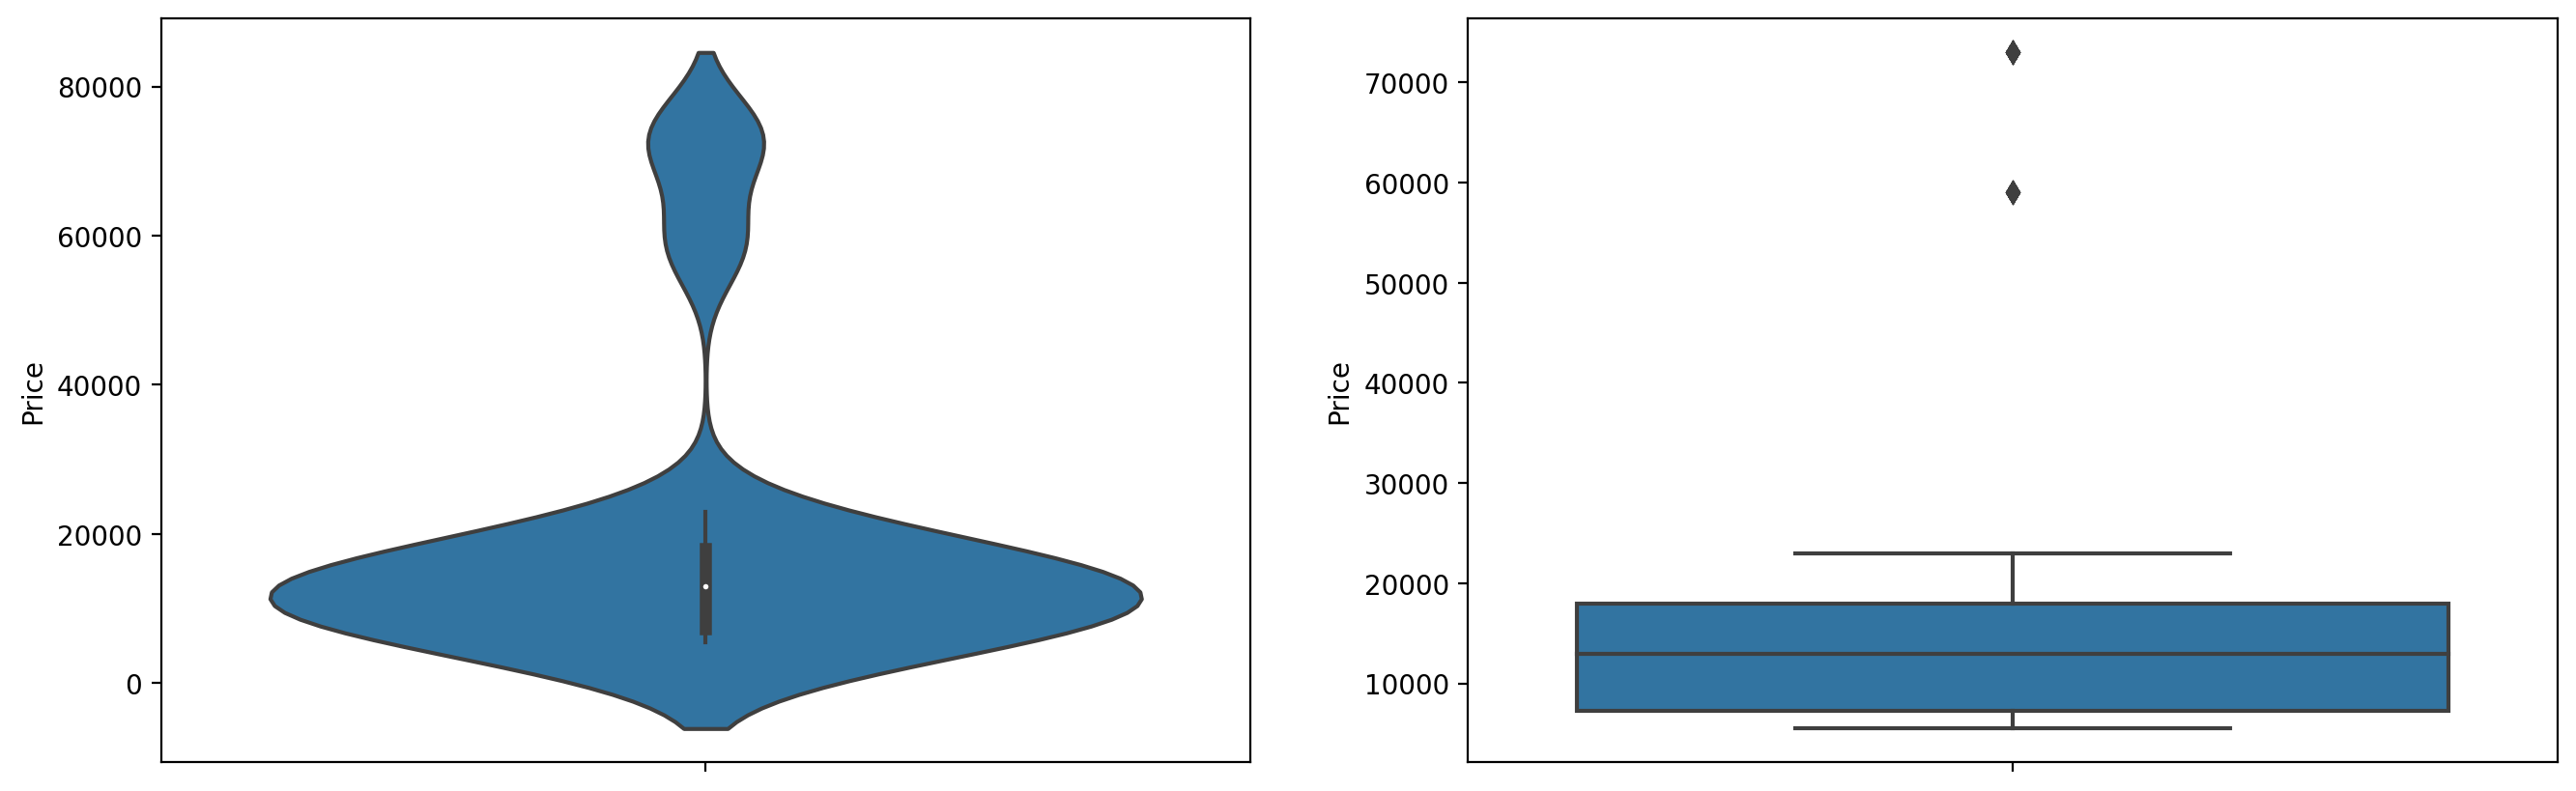

In [36]:
plt.figure(figsize=(16,5),dpi=200)
plt.subplot(1,2,1)
sns.violinplot(y='Price',data=flipkart1)
plt.subplot(1,2,2)
sns.boxplot(y='Price',data=flipkart1) #most of phone price ranges from 10 to 20k 

<Figure size 2400x1000 with 0 Axes>

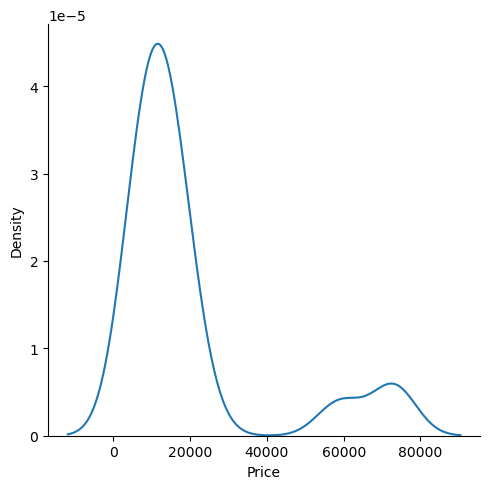

In [37]:
plt.figure(figsize=(12,5),dpi=200)
sns.displot(x=flipkart1['Price'],kind='kde') #most price ranges from 10 to 20k 

<Axes: xlabel='Rating', ylabel='Price'>

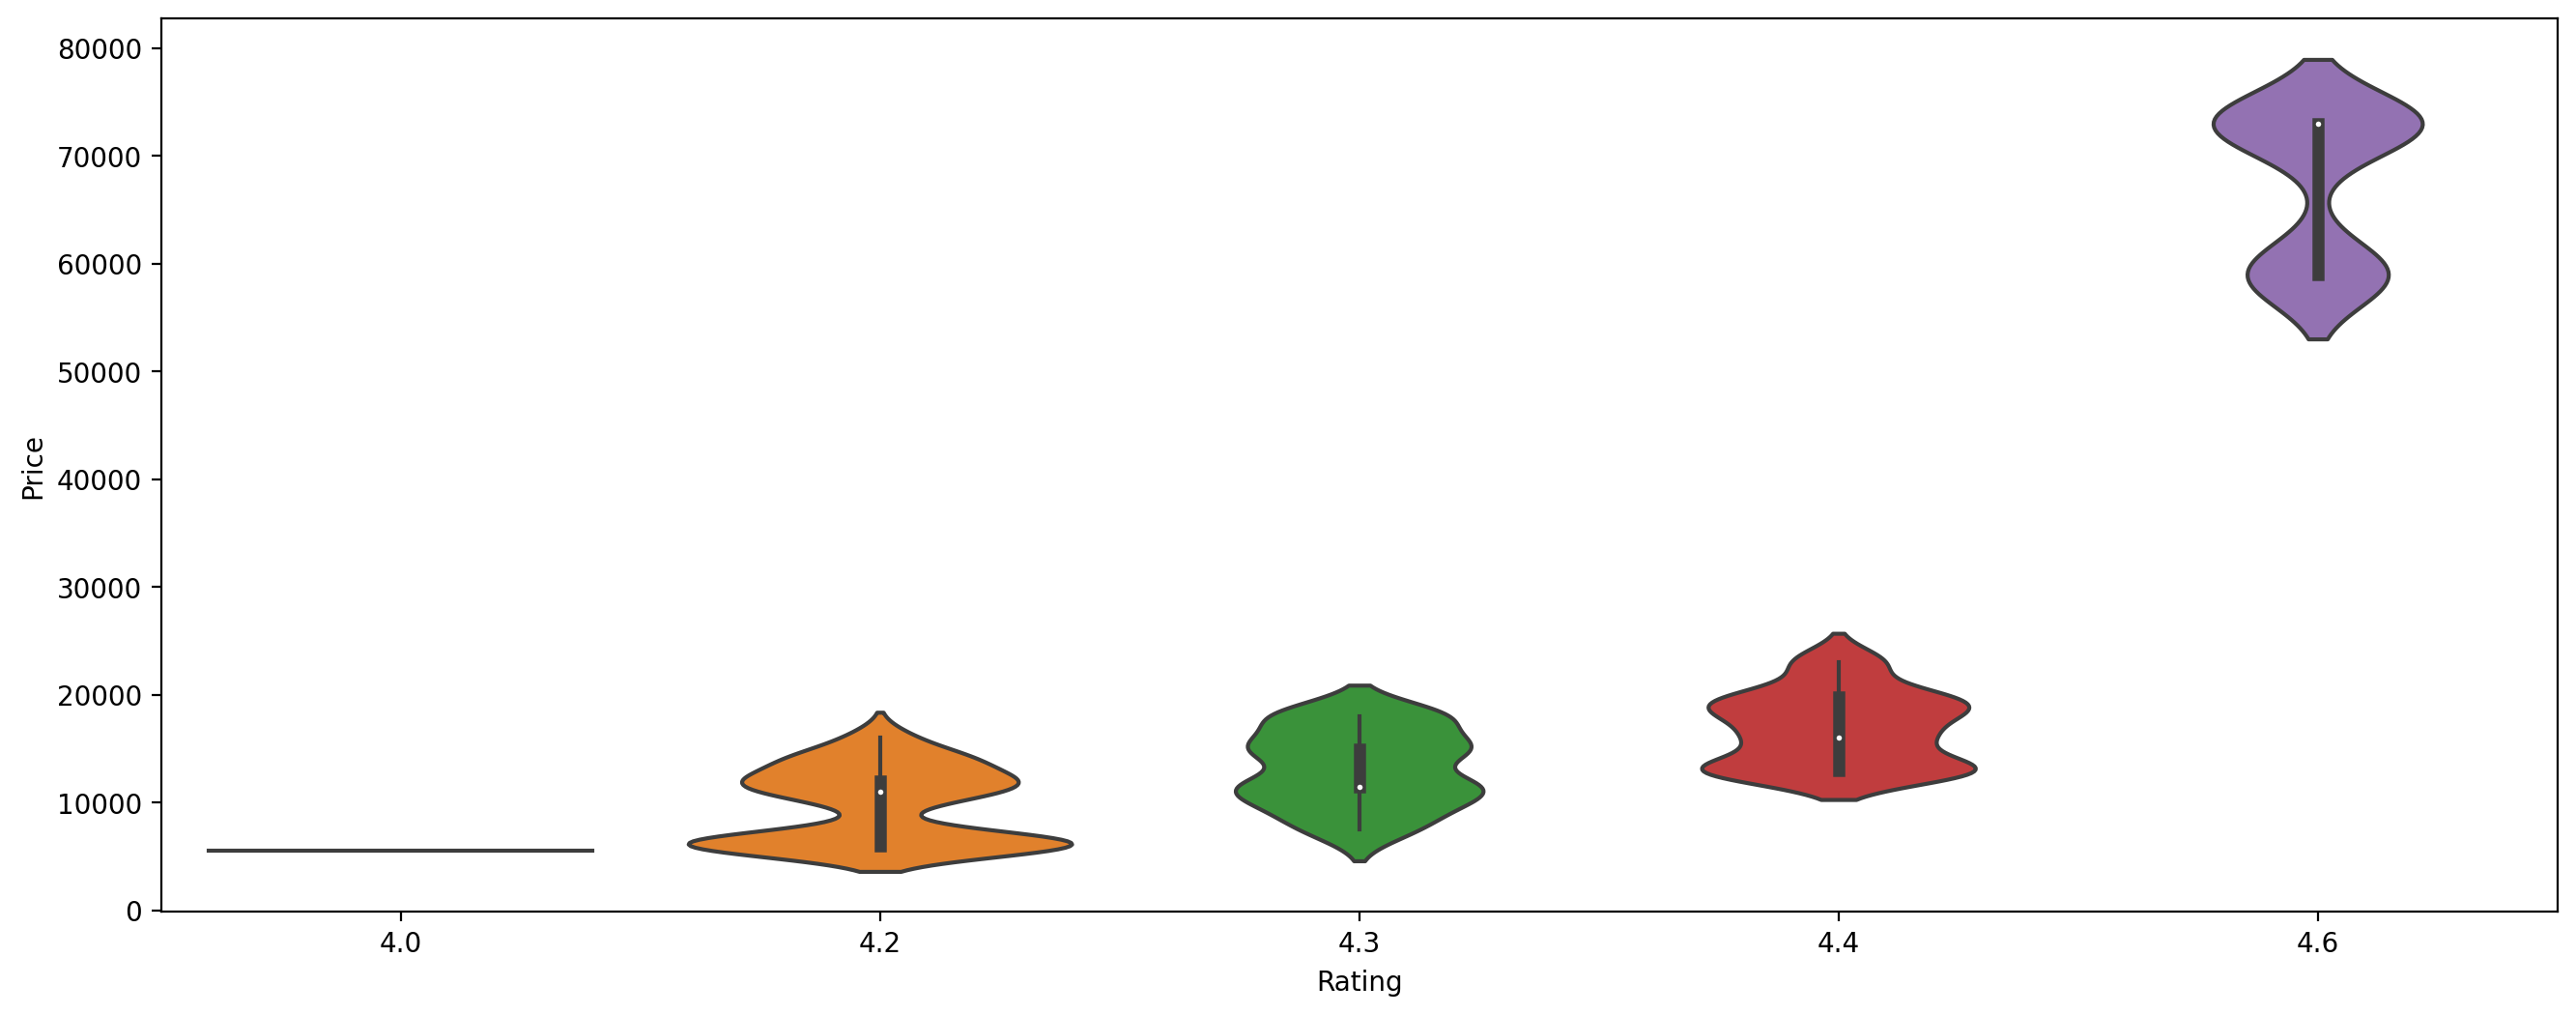

In [48]:
plt.figure(figsize = (16,6), dpi = 200)
sns.violinplot(x='Rating',y='Price', data =flipkart1) #Expensive phones have high rating 

<Axes: xlabel='RAM', ylabel='count'>

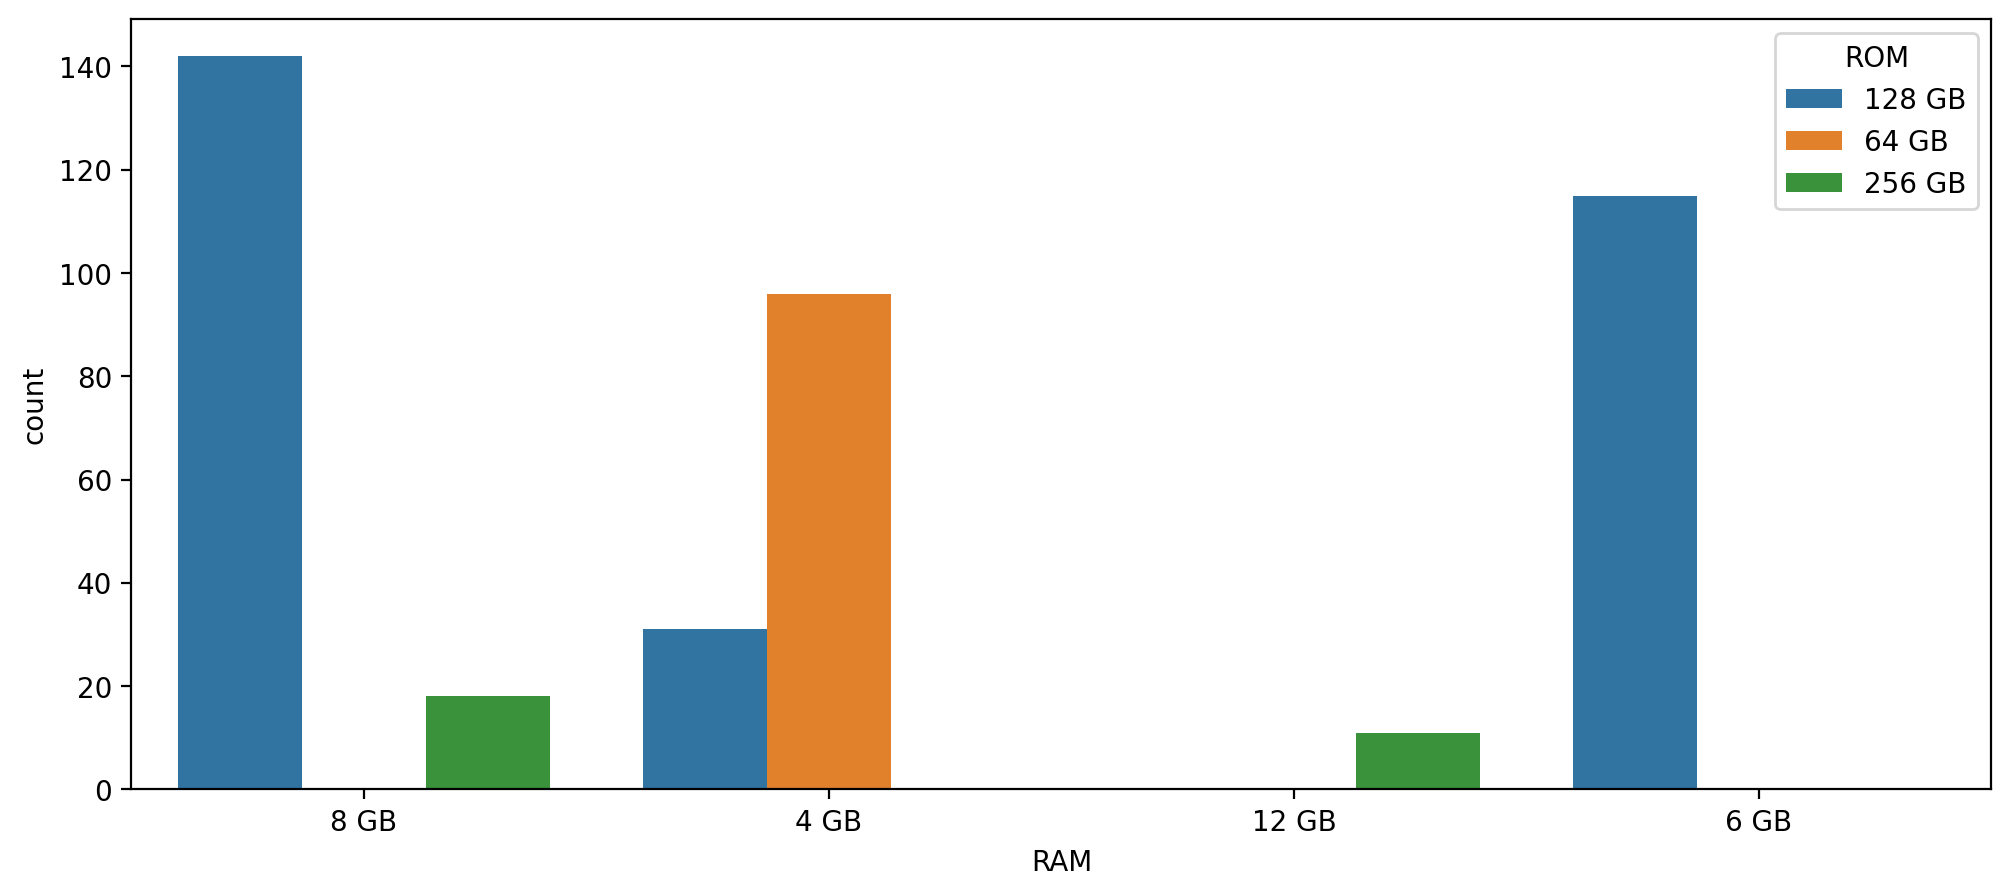

In [38]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='RAM',hue='ROM',data=flipkart1) #most available ram is 8gb & rom 128gb

<Axes: xlabel='RAM', ylabel='count'>

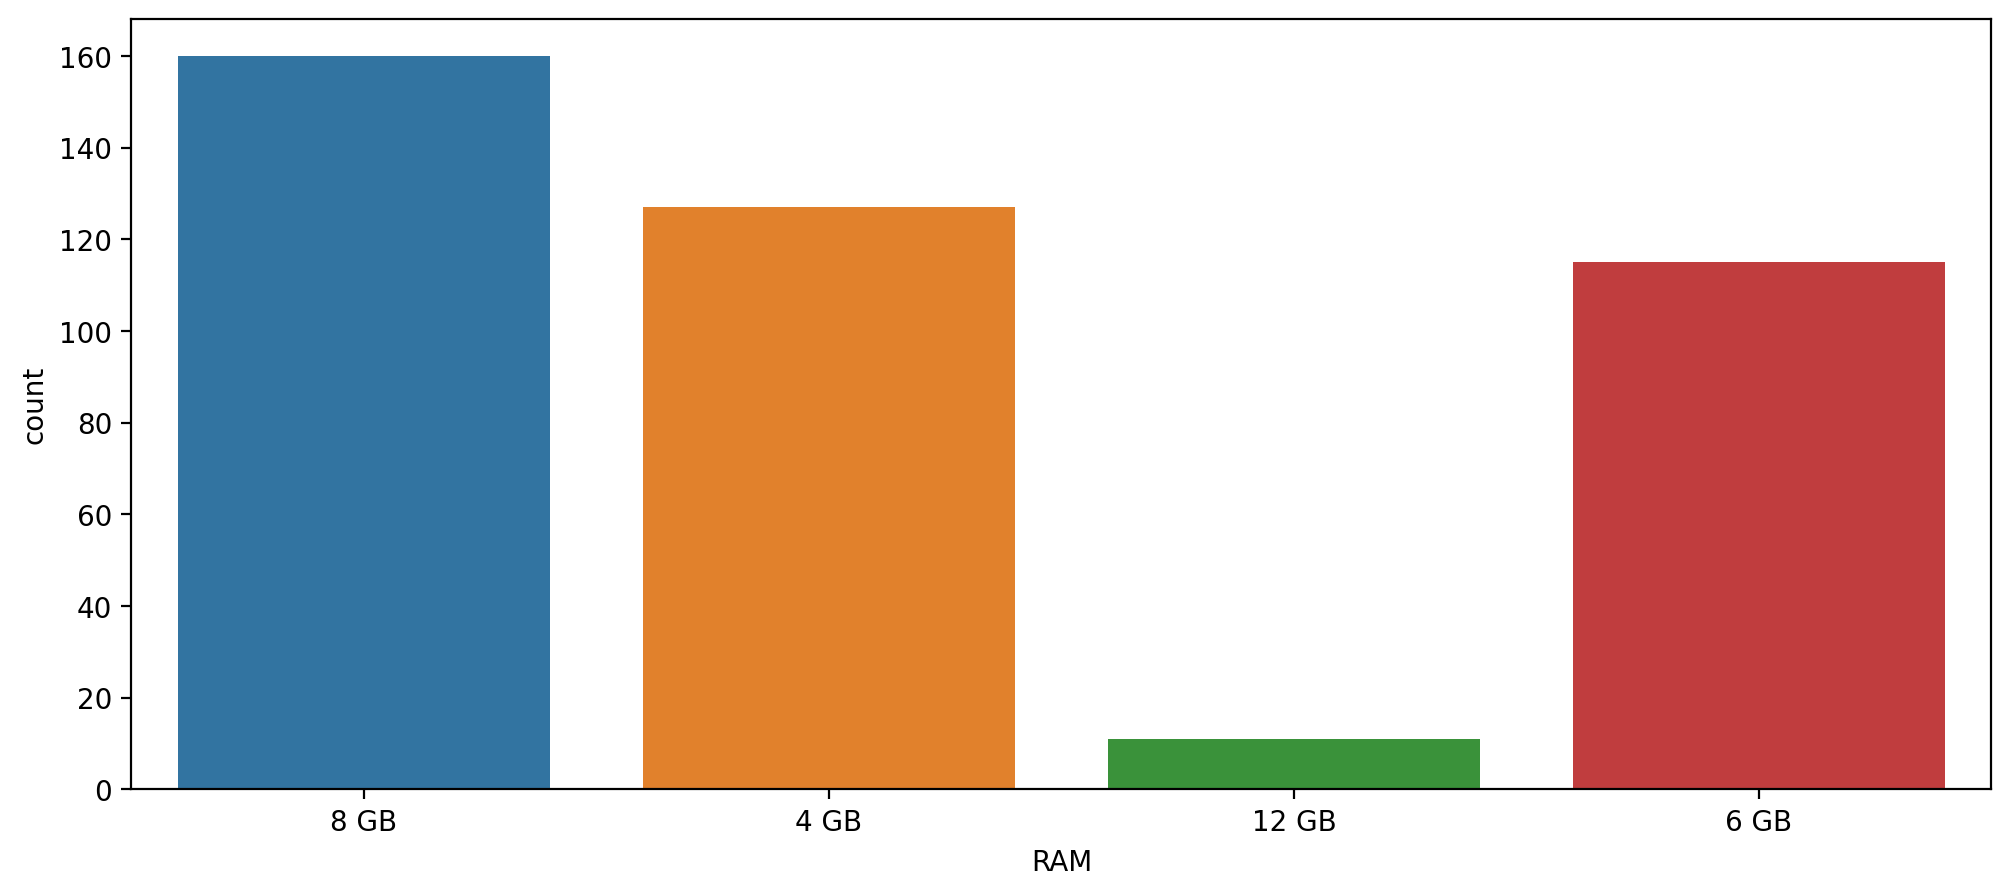

In [39]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='RAM',data=flipkart1) #8gb ram is available more

<Axes: xlabel='ROM', ylabel='count'>

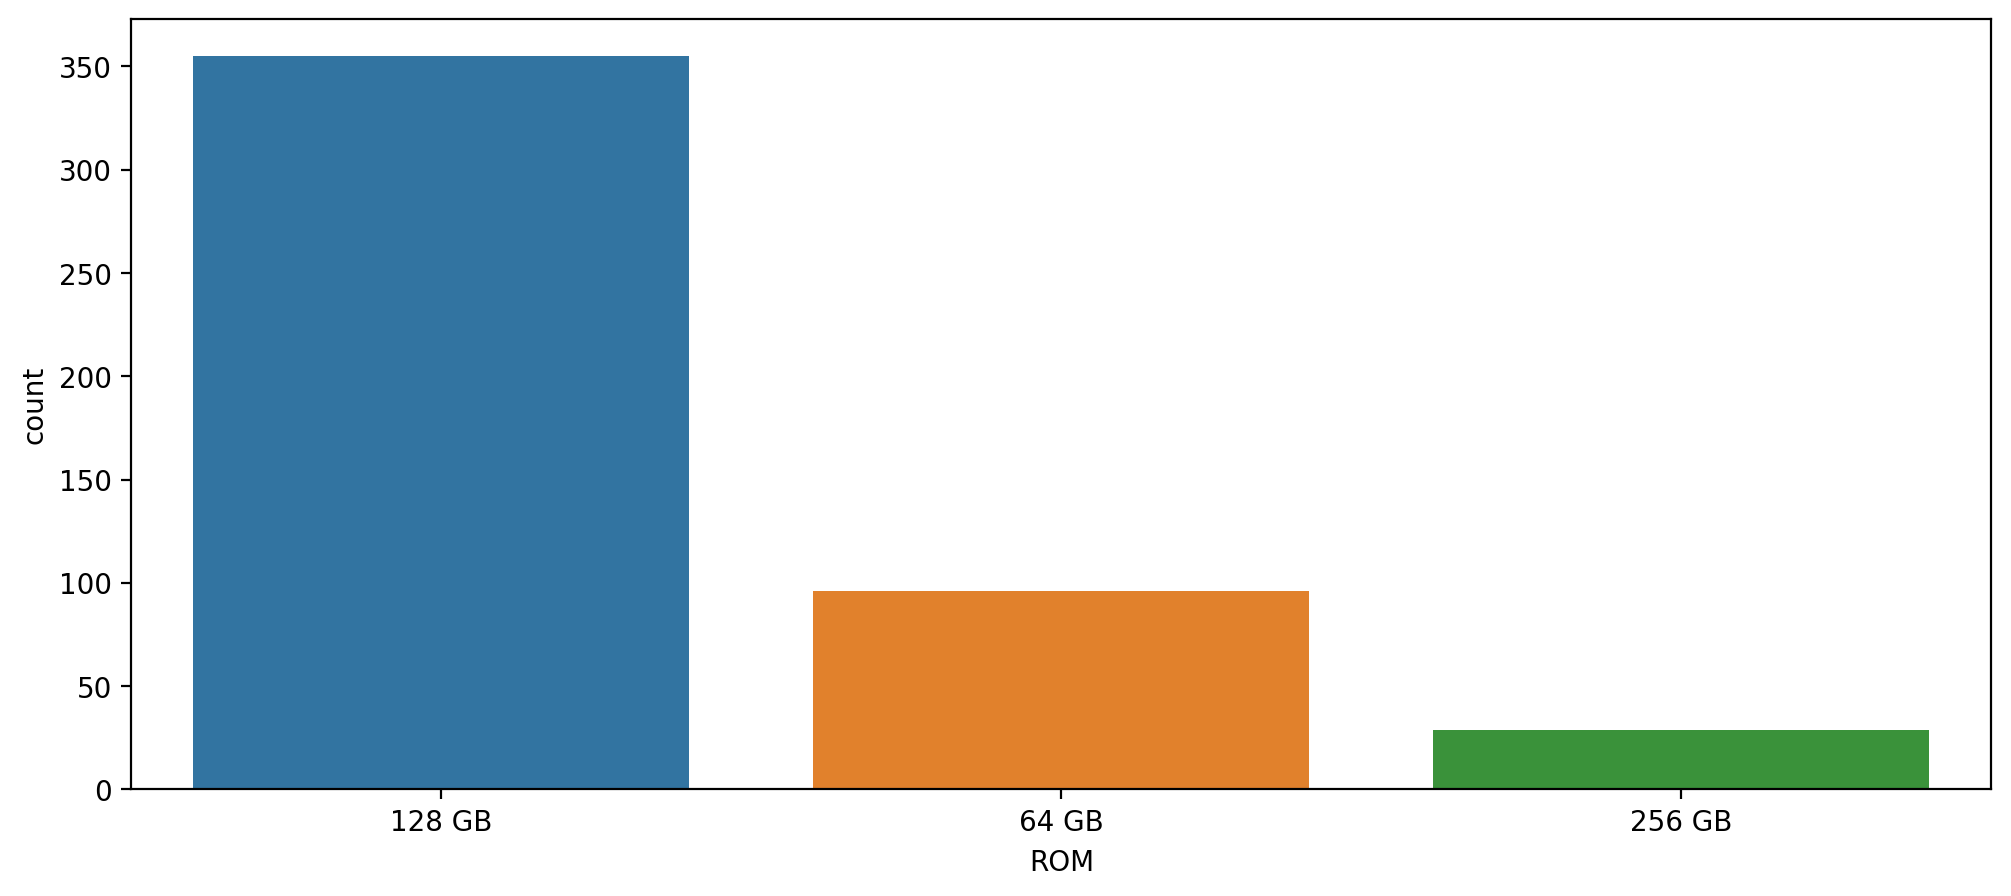

In [41]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='ROM',data=flipkart1) #128gb rom is available more

<Axes: xlabel='Rating', ylabel='Price'>

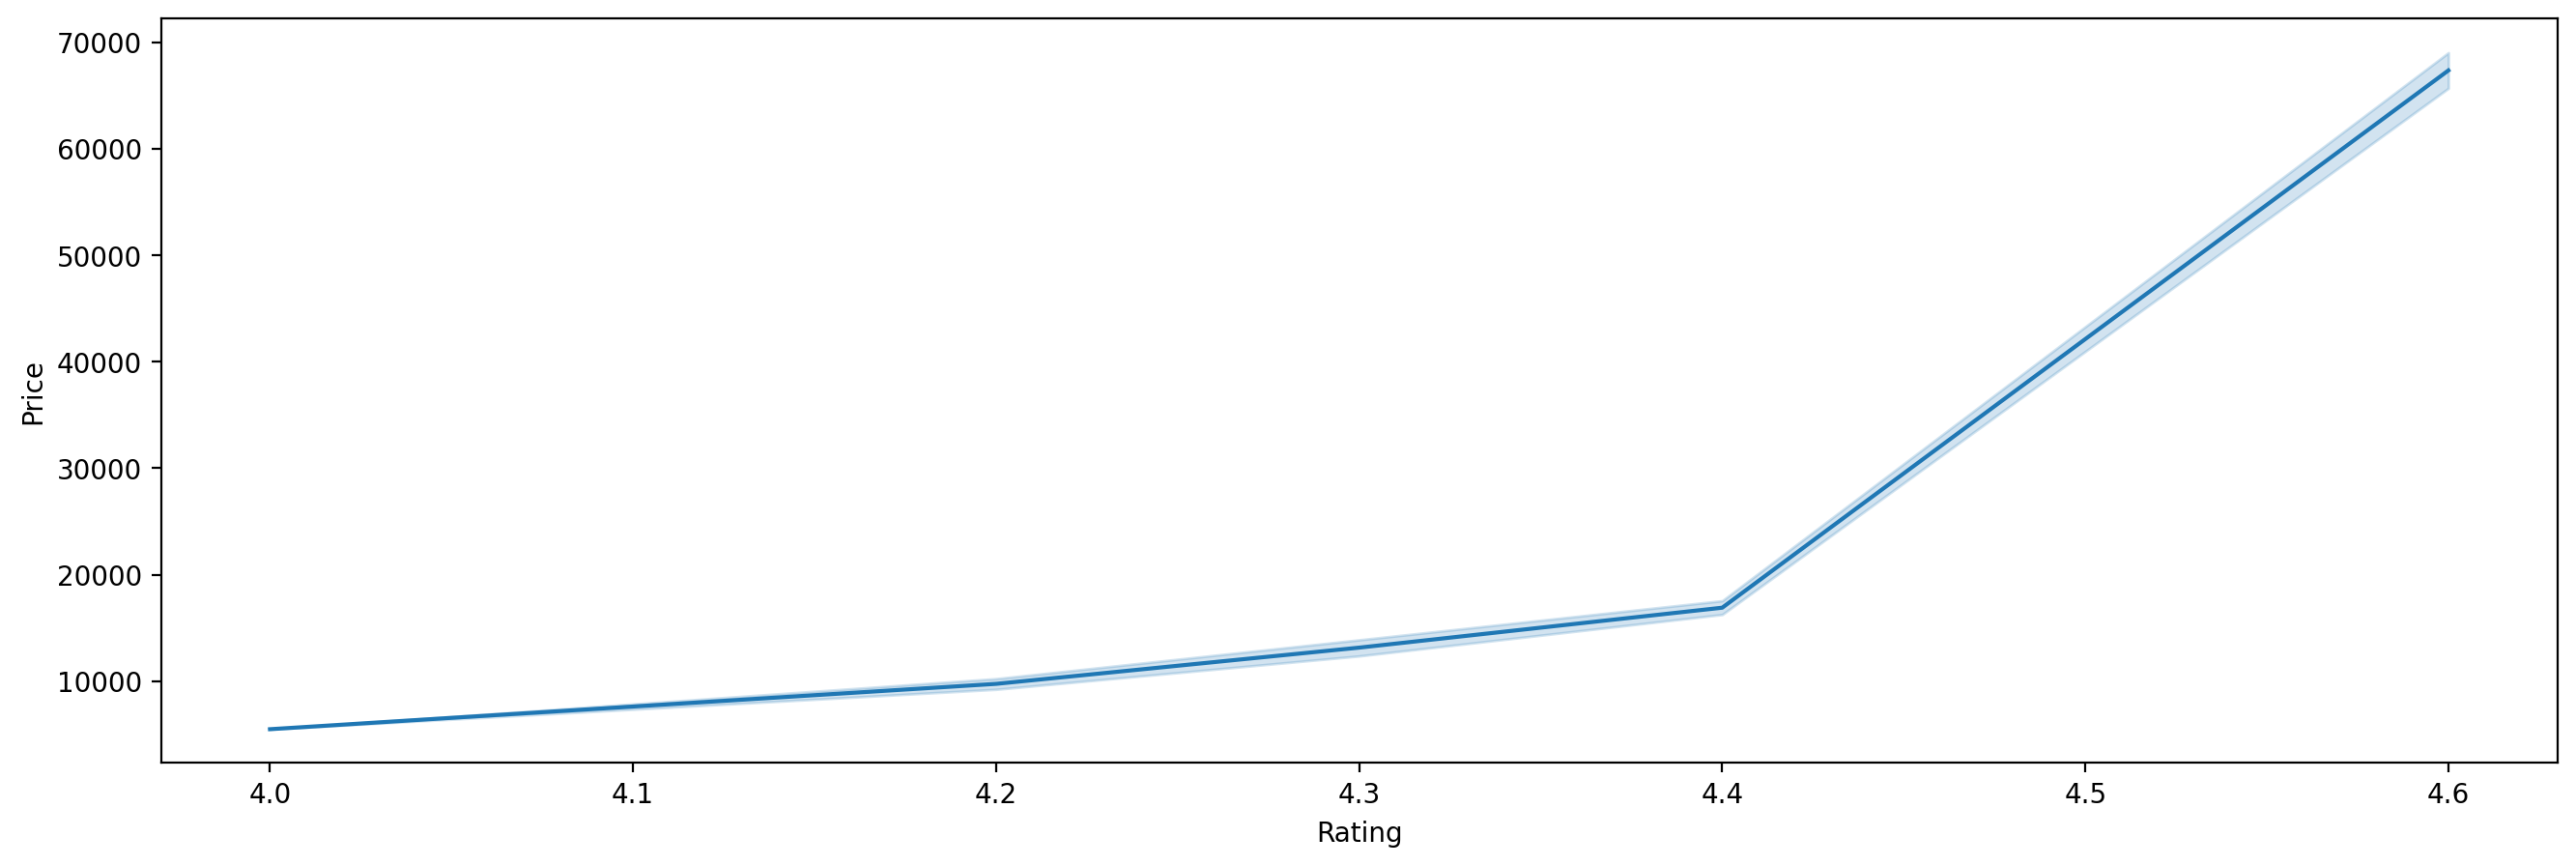

In [43]:
plt.figure(figsize=(16,5),dpi=200)
sns.lineplot(x='Rating',y='Price',data=flipkart1) #Expensive phone has high rating

In [44]:
flipkart1.describe() #descriptive statistics 

,Unnamed: 0,Price,Rating
count,480.000000,480.000000,480.000000
mean,239.500000,19580.131250,4.301667
std,138.708327,19924.283076,0.156012
min,0.000000,5499.000000,4.000000
25%,119.750000,7249.000000,4.200000
50%,239.500000,12999.000000,4.300000
75%,359.250000,17999.000000,4.400000
max,479.000000,72999.000000,4.600000


In [47]:
flipkart1[flipkart1.Price>10000] #phone with price > 10k

,Unnamed: 0,Product_name,Price,Rating,Features,RAM,ROM
0,0,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",8 GB,128 GB
1,1,"Apple iPhone 15 (Blue, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",NaN,128 GB
2,2,"Motorola G34 5G (Ocean Green, 128 GB)",10999.0,4.2,"4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",4 GB,128 GB
3,3,"Motorola g54 5G (Midnight Blue, 128 GB)",13999.0,4.2,"8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",8 GB,128 GB
5,5,"Motorola g54 5G (Midnight Blue, 256 GB)",15999.0,4.2,"12 GB RAM | 256 GB ROM | Expandable Upto 1 TB,...",12 GB,256 GB
...,...,...,...,...,...,...,...
474,474,"POCO M6 Pro 5G (Forest Green, 128 GB)",11499.0,4.3,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",6 GB,128 GB
475,475,"vivo T2x 5G (Aurora Gold, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",6 GB,128 GB
476,476,"vivo T2x 5G (Glimmer Black, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",6 GB,128 GB
477,477,"vivo T2x 5G (Marine Blue, 128 GB)",12999.0,4.4,"6 GB RAM | 128 GB ROM,16.71 cm (6.58 inch) Ful...",6 GB,128 GB


In [49]:
flipkart1[flipkart1.Price<10000] #phone with cheapest price 

,Unnamed: 0,Product_name,Price,Rating,Features,RAM,ROM
4,4,"POCO C51 (Royal Blue, 64 GB)",5499.0,4.0,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB,64 GB
7,7,"POCO C55 (Forest Green, 128 GB)",6499.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",6 GB,128 GB
8,8,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",5999.0,4.2,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB,64 GB
11,11,"POCO M6 5G (Orion Blue, 128 GB)",9499.0,4.3,"4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",4 GB,128 GB
12,12,"POCO C55 (Cool Blue, 128 GB)",6499.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",6 GB,128 GB
...,...,...,...,...,...,...,...
464,464,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",5999.0,4.2,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB,64 GB
467,467,"POCO M6 5G (Orion Blue, 128 GB)",9499.0,4.3,"4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",4 GB,128 GB
468,468,"POCO C55 (Cool Blue, 128 GB)",6499.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",6 GB,128 GB
469,469,"POCO C55 (Power Black, 128 GB)",6499.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",6 GB,128 GB
